<a href="https://colab.research.google.com/github/pannavich/2143488_Big_Data_and_AI/blob/main/HW10_Artificial-Neural-Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Big Data AI/HW3/HW3_movie_metadata.csv')
df_copy = pd.read_csv('/content/drive/MyDrive/Big Data AI/HW3/HW3_movie_metadata.csv')
df.head(10)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [ ]:
print(df.describe())
print(len(df))
'''
df = df.dropna()
print(df.describe())
print(len(df))
'''

       num_critic_for_reviews     duration  ...  aspect_ratio  movie_facebook_likes
count             4993.000000  5028.000000  ...   4714.000000           5043.000000
mean               140.194272   107.201074  ...      2.220403           7525.964505
std                121.601675    25.197441  ...      1.385113          19320.445110
min                  1.000000     7.000000  ...      1.180000              0.000000
25%                 50.000000    93.000000  ...      1.850000              0.000000
50%                110.000000   103.000000  ...      2.350000            166.000000
75%                195.000000   118.000000  ...      2.350000           3000.000000
max                813.000000   511.000000  ...     16.000000         349000.000000

[8 rows x 16 columns]
5043


'\ndf = df.dropna()\nprint(df.describe())\nprint(len(df))\n'

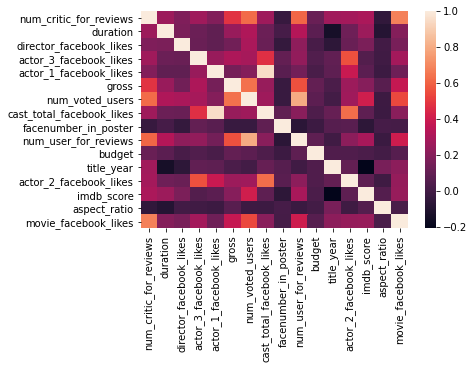

In [ ]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr)

In [ ]:
cor_target = abs(corr['imdb_score'])
print(cor_target)
cor_target = cor_target[cor_target>=0.2]
cor_target

num_critic_for_reviews       0.305303
duration                     0.261662
director_facebook_likes      0.170802
actor_3_facebook_likes       0.052633
actor_1_facebook_likes       0.076099
gross                        0.198021
num_voted_users              0.410965
cast_total_facebook_likes    0.085787
facenumber_in_poster         0.062958
num_user_for_reviews         0.292475
budget                       0.030688
title_year                   0.209167
actor_2_facebook_likes       0.083808
imdb_score                   1.000000
aspect_ratio                 0.059445
movie_facebook_likes         0.247049
Name: imdb_score, dtype: float64


num_critic_for_reviews    0.305303
duration                  0.261662
num_voted_users           0.410965
num_user_for_reviews      0.292475
title_year                0.209167
imdb_score                1.000000
movie_facebook_likes      0.247049
Name: imdb_score, dtype: float64

In [ ]:
cut_features = pd.DataFrame()
cut_features = pd.concat([cut_features,df['num_critic_for_reviews']],axis = 1)
cut_features = pd.concat([cut_features,df['duration']],axis = 1)
# cut_features = pd.concat([cut_features,df['gross']],axis = 1)
cut_features = pd.concat([cut_features,df['num_voted_users']],axis = 1)
cut_features = pd.concat([cut_features,df['num_user_for_reviews']],axis = 1)
#cut_features = pd.concat([cut_features,df['title_year']],axis = 1)
cut_features = pd.concat([cut_features,df['movie_facebook_likes']],axis = 1)
cut_features = pd.concat([cut_features,df['imdb_score']],axis = 1)
cut_features=cut_features.dropna()
cut_features


,num_critic_for_reviews,duration,num_voted_users,num_user_for_reviews,movie_facebook_likes,imdb_score
0,723.0,178.0,886204,3054.0,33000,7.9
1,302.0,169.0,471220,1238.0,0,7.1
2,602.0,148.0,275868,994.0,85000,6.8
3,813.0,164.0,1144337,2701.0,164000,8.5
5,462.0,132.0,212204,738.0,24000,6.6
...,...,...,...,...,...,...
5038,1.0,87.0,629,6.0,84,7.7
5039,43.0,43.0,73839,359.0,32000,7.5
5040,13.0,76.0,38,3.0,16,6.3
5041,14.0,100.0,1255,9.0,660,6.3


6.6


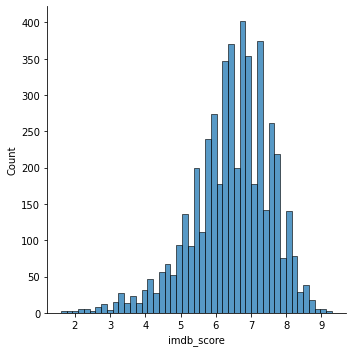

In [ ]:
sns.displot(cut_features,x='imdb_score')
print(np.percentile(cut_features['imdb_score'],50))

In [ ]:
def label(df=cut_features,col='imdb_score'):
  for i in df.index:
    if df.at[i,col]>=6.6:
      df.loc[i,col]='high'
    else:
      df.loc[i,col]='low'

label()
cut_features

,num_critic_for_reviews,duration,num_voted_users,num_user_for_reviews,movie_facebook_likes,imdb_score
0,723.0,178.0,886204,3054.0,33000,high
1,302.0,169.0,471220,1238.0,0,high
2,602.0,148.0,275868,994.0,85000,high
3,813.0,164.0,1144337,2701.0,164000,high
5,462.0,132.0,212204,738.0,24000,high
...,...,...,...,...,...,...
5038,1.0,87.0,629,6.0,84,high
5039,43.0,43.0,73839,359.0,32000,high
5040,13.0,76.0,38,3.0,16,low
5041,14.0,100.0,1255,9.0,660,low


In [ ]:
X = cut_features.drop('imdb_score',axis =1)
y = cut_features['imdb_score']


In [ ]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y = pd.DataFrame(dummy_y)
dummy_y

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
4977,1.0,0.0
4978,1.0,0.0
4979,0.0,1.0
4980,0.0,1.0


In [ ]:
#5 inputs -> 8 hidden -> 2output
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=5, activation='relu'))
	model.add(Dense(2, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[246   0]
 [253   0]]
Fold  1


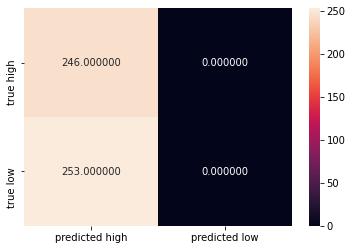

Accuracy  0.49298596382141113
----------------------


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[230  19]
 [204  46]]
Fold  2


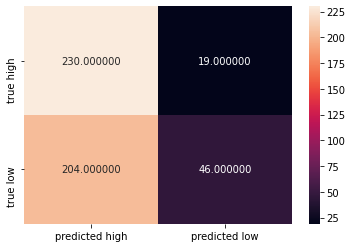

Accuracy  0.5531061887741089
----------------------


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[252   0]
 [246   0]]
Fold  3


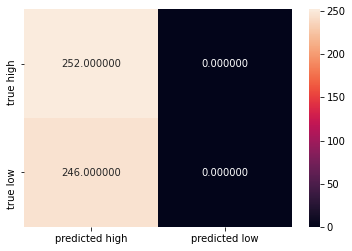

Accuracy  0.5060241222381592
----------------------


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[242   0]
 [256   0]]
Fold  4


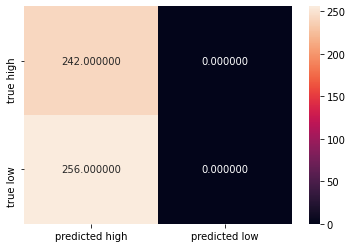

Accuracy  0.4859437644481659
----------------------


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[247   0]
 [250   1]]
Fold  5


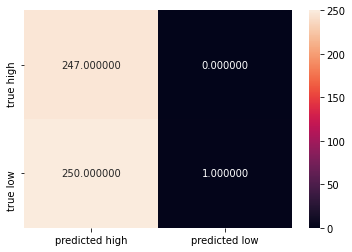

Accuracy  0.49799197912216187
----------------------


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[168  79]
 [120 131]]
Fold  6


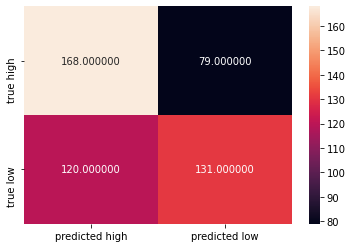

Accuracy  0.6004015803337097
----------------------


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[255  14]
 [205  24]]
Fold  7


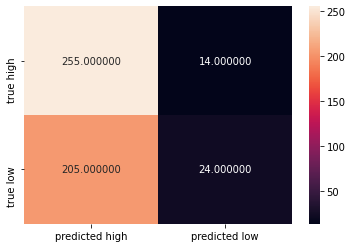

Accuracy  0.5602409839630127
----------------------


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[146 107]
 [ 75 170]]
Fold  8


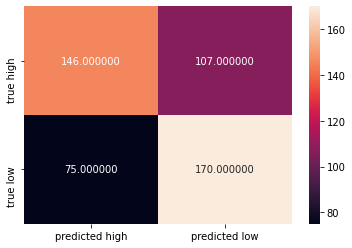

Accuracy  0.6345381736755371
----------------------


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[246  18]
 [206  28]]
Fold  9


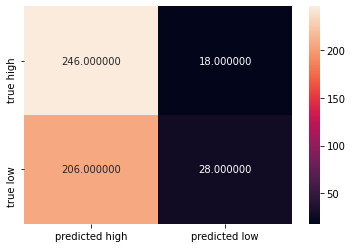

Accuracy  0.5502008199691772
----------------------


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[ 90 163]
 [ 18 227]]
Fold  10


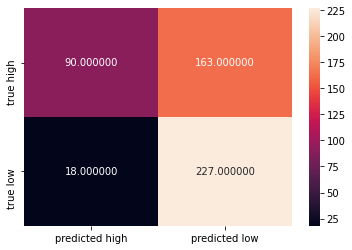

Accuracy  0.6365461945533752
----------------------
Average acc  0.5517979770898819


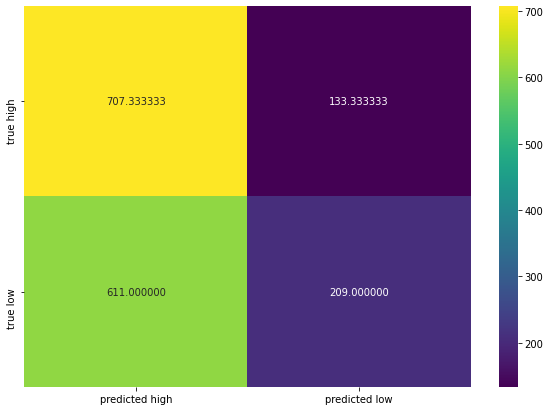

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
estimator = KerasClassifier(build_fn=baseline_model, epochs=300, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
accs=[]
cms=[]
x_axis_labels = ['predicted high','predicted low'] # labels for x-axis
y_axis_labels = ['true high','true low'] # labels for y-axis
count=1
for train_index,test_index in kfold.split(X):
  X_train,X_test = X.iloc[train_index,:],X.iloc[test_index,:]
  y_train,y_test = dummy_y.iloc[train_index,:],dummy_y.iloc[test_index,:]
  estimator.fit(X_train,y_train)
  y_pred = pd.DataFrame(estimator.predict(X_test))
  # print(y_pred)
  # print(y_test)
  # print(y_test.idxmax(axis=1))
  acc = estimator.score(X_test,y_test)
  cm = confusion_matrix(y_test.idxmax(axis=1),y_pred)
  print(cm)
  print('Fold ',count)
  count+=1
  sns.heatmap(cm,annot=True,fmt='f',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
  plt.show()
  print('Accuracy ',acc)
  accs.append(acc)
  cms.append(cm)
  print('----------------------')

total_matrix = [[0,0],[0,0]]
for i in cms:
  total_matrix+=i
mean_matrix = total_matrix/3
mean_cm = pd.DataFrame(mean_matrix,index=['true high','true low'],columns=['predicted high','predicted low'])
plt.figure(figsize=(10,7))
sns.heatmap(mean_cm,annot=True,fmt='f',cmap='viridis')
print('Average acc ',np.mean(accs))
# results = cross_val_score(estimator, X, dummy_y, cv=kfold)
# print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
